## Revenue growth for Healthcare

## Introduction

The healthcare revenue project is aimed at investigating the drivers of revenue for FMPF Medical Group across various clinics and hospitals in different locations. This project will involve data analysis and predictive modeling to provide insights and recommendations for the Financial Planning Team. 

### Project Overview 

Data is collected from various clinics and hospitals over the past year, with each clinic providing data from a random day in the year. The data includes patient numbers and ratios, satisfaction scores, ownership type, location type, admitted patients, nurse-patient ratios, emergency department visits, and revenue. 

    
### Data Dictonary

| Column Name           | Data Type | Allowed Values                                          |
| ---------------------| ---------| ------------------------------------------------------- |
| clinic_id             | Discrete  | Unique identifier for the clinic                        |
| ownership             | Categorical| Profit, Non-Profit, Public                              |
| hospital_location    | Categorical| Urban, Rural                                            |
| admitted_patients     | Discrete  | Any positive integer                                    |
| nurse_patient_ratio   | Continuous| Any value between 0.0 and 1.0                           |
| ed_visits             | Discrete  | Any positive integer                                    |
| satisfaction_score    | Continuous| Any value between 1 and 10                              |
| revenue               | Continuous| Any positive value to two decimal places                |



## Data Validation

The Health revenue dataset contains 1990 rows and 8 columns. The data was collected from various clinics over the past year.Records are randomly picked for various dates of various clinics/hospitals in FMPF Medical Group.

We will do the validations and perform imputations wherever required.

| Column Name           | Description                                                                                                                                           | Data Type    | Number of Rows | Number of Missing Values | Possible Values/Range                                                                 | Imputation           |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|--------------|----------------|--------------------------|--------------------------------------------------------------------------------------|----------------------|
| clinic_id             | A unique identifier for each clinic                                                                                                                  | Integer      | 1990           | 0                        | Positive integers                                                                    | N/A                  |
| ownership             | The ownership type of each medical facility                                                                                                          | Categorical  | 1990           | 0                        | Profit, Non-Profit, Public                                                           | N/A                  |
| hospital_location     | The location type of each medical facility                                                                                                           | Categorical  | 1990           | 0                        | Urban, Rural                                                                         | N/A                  |
| admitted_patients     | The number of patients admitted to each medical facility on a given day                                                                              | Discrete     | 1990           | 0                        | Positive integers                                                                    | N/A                  |
| nurse_patient_ratio   | The ratio of nurses to patients                                                                                                                      | Continuous   | 1990           | 0                        | Ranges from 0.0 to 1.0 inclusive                                                     | N/A                  |
| ed_visits             | The number of emergency department visits during a given day                                                                                         | Discrete     | 1990           | 0                        | Positive integers and some negative integers (filtering out negative integers is recommended) | N/A                  |
| satisfaction_score    | The satisfaction score given by patients about their experience                                                                                     | Continuous   | 1655           | 159                      | Ranges from 1 to 10 inclusive (missing values need to replace with median)           | Repl mean orace wit based on distribution typeh median  |
| revenue               | The daily revenue value generated by each medical facility                                                                                          | Continuous   | 1990           | 0                        | Positive values up to two decimal places                                             | N/A                  |



In [564]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [565]:
#Import the dataset

df = pd.read_csv("C://Users/dubba/Downloads/Github_Repo/HealthCare_Revenue_Growth_Prediction/health_revenue.csv")
df.head()
df_copy=df.copy()

In [566]:
#get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1990 non-null   int64  
 1   ownership            1990 non-null   object 
 2   hospital_location    1990 non-null   object 
 3   admitted_patients    1990 non-null   int64  
 4   nurse_patient_ratio  1990 non-null   float64
 5   ed_visits            1990 non-null   int64  
 6   satisfaction_score   1831 non-null   float64
 7   revenue              1990 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 124.5+ KB


### Make sure column names are meaningful else rename the columns make them uniform

### Check if there are any duplicate records

In [569]:
duplicates = df.duplicated()
duplicates_df = df[duplicates]
# No Duplicates found in the dataset.

In [570]:
#check the data
df.describe()
#Describe gives the statistics of all the numerical values in the dataset.

,clinic_id,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
count,1990.000000,1990.000000,1990.000000,1990.000000,1831.000000,1990.000000
mean,997.214070,25.400503,0.503251,23.250251,4.515418,88076.974523
std,577.514303,14.144905,0.285727,16.373214,2.753724,29644.679778
min,0.000000,1.000000,0.000000,-49.000000,1.000000,16432.280000
25%,491.250000,14.000000,0.250000,11.000000,2.190000,65186.840000
50%,1003.000000,25.000000,0.500000,24.000000,3.440000,88086.915000
75%,1497.750000,38.000000,0.750000,36.000000,7.110000,110556.667500
max,1989.000000,49.000000,1.000000,49.000000,9.990000,156115.420000


### Exploratory Data Analysis

##### Here our goal is to identify the factors which influence the revenue growth.
###### Target variable = Revenue --> numerical value

In [572]:
#check for any null or missing values
df.isna().sum()

clinic_id                0
ownership                0
hospital_location        0
admitted_patients        0
nurse_patient_ratio      0
ed_visits                0
satisfaction_score     159
revenue                  0
dtype: int64

#### We can see the satisfaction score has the 159(7%) null values out of 1990 rows.
Satisfaction score is a float value ranges from 1 to 9.99 we can convert this into a integer value and apply mean or median based on skewness to fill the missing values.

In [574]:
df.ed_visits.value_counts()

ed_visits
 11    51
 17    50
 8     49
 46    47
 42    47
       ..
-3      1
-46     1
-17     1
-1      1
-26     1
Name: count, Length: 83, dtype: int64

In [575]:
# filter out negative values of ed_visits since it is only 5% of the data
df = df[df['ed_visits']>=0]

<Axes: xlabel='ownership', ylabel='count'>

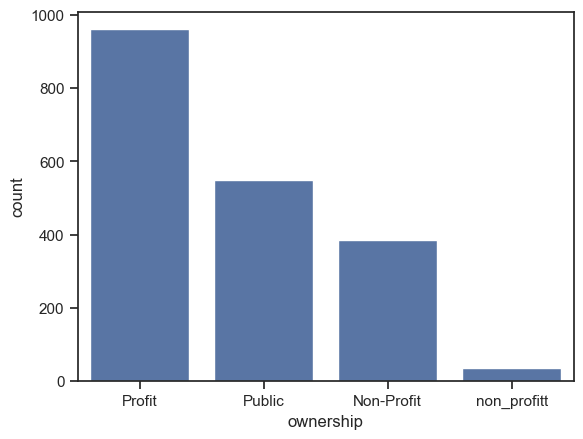

In [576]:
#Perform Univariate Data Analysis
sns.countplot(data=df,x='ownership',stat="count",orient="y")

<Axes: xlabel='hospital_location', ylabel='count'>

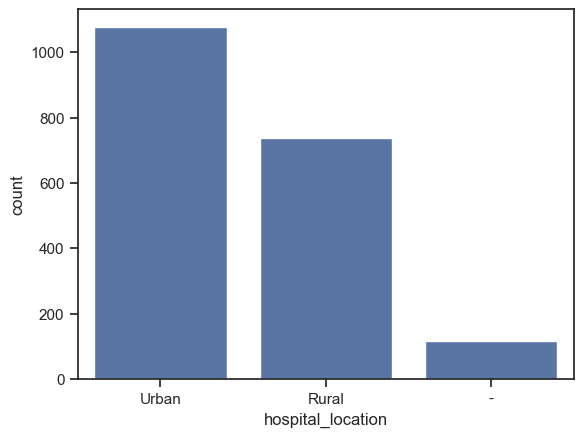

In [577]:
sns.countplot(data=df,x='hospital_location')

### From the above univariate analysis we can perform following translations on the raw dataset.
1) For ownership rename the category non_profit to Non-Profit.
2) Hospital_location contains few values as '-' which indicates missing data we can replace it with mode imputation
3) Satisfaction Score ranges from 1-9.9 however its always a good idea to make it as numerical value by rounding the values.
4) ed_visits indicates the emergency department visits of that clinic. We see the Negative values, needs to be identify and fix that

In [579]:
df['ownership'] = df['ownership'].replace('non_profitt','Non-Profit')
df['ownership'].value_counts()
#df[df['ownership']=='non_profitt']

ownership
Profit        961
Public        548
Non-Profit    422
Name: count, dtype: int64

In [580]:
df['hospital_location'] = df['hospital_location'].replace('-',df['hospital_location'].mode()[0])
df['hospital_location'].value_counts()

hospital_location
Urban    1194
Rural     737
Name: count, dtype: int64

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1931 entries, 0 to 1989
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clinic_id            1931 non-null   int64  
 1   ownership            1931 non-null   object 
 2   hospital_location    1931 non-null   object 
 3   admitted_patients    1931 non-null   int64  
 4   nurse_patient_ratio  1931 non-null   float64
 5   ed_visits            1931 non-null   int64  
 6   satisfaction_score   1776 non-null   float64
 7   revenue              1931 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 135.8+ KB


In [582]:
def lb_encoder(df,cols):
    """
    This function converts the categorical values into labels
    Input:It takes the dataframe and columns as input
    Output: Returns the dataframe with updated column values
       
    """
    le = LabelEncoder()
    for col in cols:
        df[col] = le.fit_transform(df[col])
    return df
    


In [583]:
cat_cols = ['ownership','hospital_location']
lb_encoder(df,cat_cols)

df_encoded_copy = df.copy()
df_encoded_copy

,clinic_id,ownership,hospital_location,admitted_patients,nurse_patient_ratio,ed_visits,satisfaction_score,revenue
0,1847,1,1,23,0.40,12,2.04,55684.18
1,422,1,1,22,0.60,11,2.77,117115.85
2,1843,2,0,47,0.37,31,3.13,72794.56
3,14,0,1,20,0.06,47,1.30,87447.23
4,1880,2,0,33,0.94,40,5.90,88848.01
...,...,...,...,...,...,...,...,...
1985,112,1,1,46,0.99,46,5.62,138695.55
1986,257,2,1,15,0.23,33,2.95,134584.60
1987,843,2,0,49,0.13,17,1.94,110533.42
1988,733,2,0,30,0.90,49,NaN,136719.84


In [584]:
#Perform mice imputation on the Satisfaction Score column
missing_mask =df_encoded_copy.isna()
#Instantiate MICE imputer with desired params
mice_imputer = IterativeImputer(max_iter=10,random_state=0)
#Fit the imputer on the data and transform it to obtain the imputer values
imputed_values = mice_imputer.fit_transform(df_encoded_copy)
#Replace missing values in the original dataset with imputed values
df_encoded_copy[missing_mask] = pd.DataFrame(imputed_values,index =df_encoded_copy.index,columns = df_encoded_copy.columns)[missing_mask]

In [585]:
df_encoded = df_encoded_copy.copy()

<Axes: xlabel='satisfaction_score', ylabel='Count'>

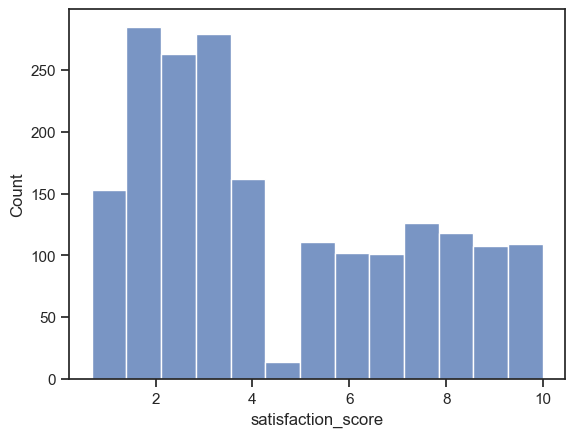

In [586]:
sns.histplot(data=df_encoded,x='satisfaction_score')

In [587]:
df_encoded['satisfaction_score'] = df_encoded['satisfaction_score'].apply(lambda x: round(x))

<Axes: xlabel='satisfaction_score', ylabel='Count'>

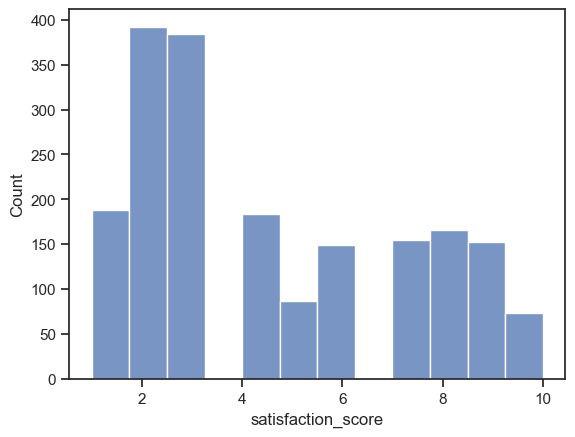

In [588]:
sns.histplot(data=df_encoded,x='satisfaction_score')

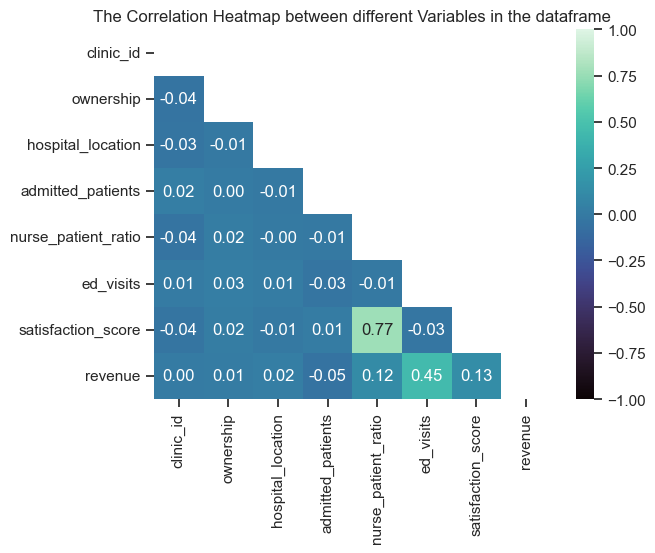

In [589]:
matrix = np.triu(df_encoded.corr())

sns.heatmap(data=df_encoded.corr(),cmap = 'mako',annot=True,fmt='0.2f',xticklabels= "auto", yticklabels = "auto",mask=matrix,vmin=-1, vmax=1,).set(title='The Correlation Heatmap between different Variables in the dataframe')

plt.show()

In [590]:
#Drop the columns which are not needed for fitting a model
df_encoded.drop('clinic_id',axis=1,inplace=True)

# From Scatter plot we have following observations:

1) We can see the Target variable 'Revenue' is Positively correlated with the ed_visits, nurse patient Ratio, Satisfaction_score
2) Negatively correlated with Hospital_location_rural and public owned hospitals These correlation states that hospitals which are publicly owned and located at rural areas are effecting the revenue growth. Might be because of lack of facilities/machinery in rural areas.
3) Among all the variables satisfaction score is highly correlated with nurse_patient_ratio.

In [592]:
#Split the data
X = df_encoded.drop(['revenue'],axis=1)

feature_cols = X.columns
y=df_encoded['revenue']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#Standardize the data
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Evaluation
- The problem is predicting the price, which is a regression problem in machine learning. 
- Linear Regression model is chosen for this problem because of the strong to moderate relationship between some features and the target variable. 
- Random forest regression model is selected for comparison as it can effectively model non-outliers, allowing for ease of interpretation.
- The evaluation metrics chosen for the models are R squared and RMSE (Root Mean Squared Error).
- R squared measures how well the model fits dependent variables while RMSE measures the deviation of predicted results from the actual number.


| Metric | Definition | Impact on Model |
|--------|------------|----------------|
| RMSE | Root Mean Squared Error, measures the average magnitude of the residuals (the difference between predicted and actual values) | The lower the RMSE, the better the model performance. A higher RMSE indicates a larger average magnitude of error, indicating a less accurate model. |
| R2 Score | Coefficient of determination, measures the proportion of variation in the dependent variable that is predictable from the independent variable(s) | A higher R2 score indicates a better fit between the predicted and actual values. It represents the percentage of the variance in the dependent variable explained by the independent variables. |

In [594]:
#Create a Linear Regression model
ln_reg = LinearRegression()

#Train the model
ln_reg.fit(X_train,y_train)
#Test the model
ln_pred = ln_reg.predict(X_test)
ln_rmse = (mean_squared_error(y_test,ln_pred))**0.5
ln_rSquared =r2_score(y_test,ln_pred)

print("Linear regression values::")
print(f"RMSE:",ln_rmse.round(2))
print(f"R-Squared:",ln_rSquared.round(2))


'''
After One_hot encoding& MICE imputation we got values as
Linear regression valeus::
RMSE: 26528.298264853474
R-Squared: 0.15818947343696077
'''

Linear regression values::
RMSE: 25839.55
R-Squared: 0.23


'\nAfter One_hot encoding& MICE imputation we got values as\nLinear regression valeus::\nRMSE: 26528.298264853474\nR-Squared: 0.15818947343696077\n'

In [595]:
#Create a Linear Regression model
Rf_reg = RandomForestRegressor()

#Train the model
Rf_reg.fit(X_train,y_train)
#Test the model
rf_pred = Rf_reg.predict(X_test)
rf_rmse = (mean_squared_error(y_test,rf_pred))**0.5
rf_rSquared =r2_score(y_test,rf_pred)

print("Random Forest regression values::")
print(f"RMSE:",rf_rmse.round(2))
print(f"R-Squared:",rf_rSquared.round(2))


Random Forest regression values::
RMSE: 27618.21
R-Squared: 0.12


### Results Comparsion :



|Model | RMSE  | Rsquared |
|--------|-------|-------------|
| Linear Regression | 25839.55 | 0.23 |
| Random Forest Regression | 27882.57 | 0.11 |
-----------------------------------

From the above results we can see the R squared of the linear regression model and the random forest regression model is 0.23 and 0.11, respectively, indicating that the Linear regression model fits the features slightly better. The RMSE of the Linear Regression model and the RandomForest model is 27882 and 25839, respectively, indicating that the Linear Regression model has less error in predicting values.

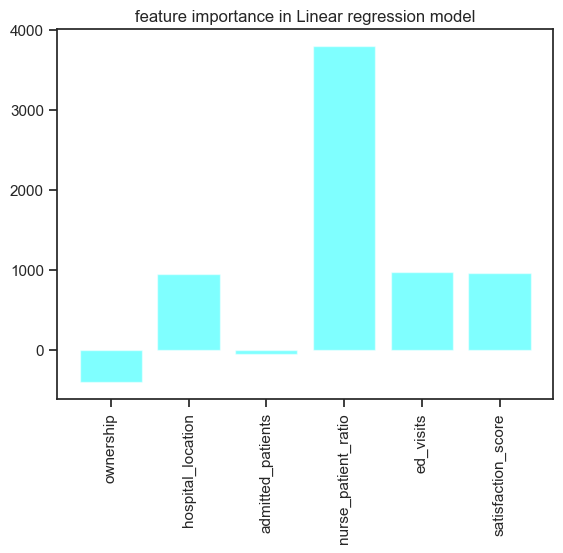

In [597]:
#Feature importance

resultdict = {}
feature_cols = X.columns
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = ln_reg.coef_[i]

plt.bar(resultdict.keys(),resultdict.values(),alpha=0.5,color ='cyan')
plt.xticks(rotation = 'vertical')
plt.title("feature importance in Linear regression model");

In [598]:
X_test['Predicted_price'] = np.round((ln_pred),0)
X_test['Price'] = np.round((y_test),0)
lr_e = X_test
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
pct = np.arange(0.05,0.25,0.05)
pct_lr = []
for p in pct:
    within_pct = len([d for d in lr_e['Diff'] if abs(d) <= p])
    pct_lr.append(within_pct/len(lr_e['Diff']) )      
    print(f'Margin of error in {int(p*100)}% range: {within_pct/len(lr_e["Diff"])}')

Margin of error in 5% range: 0.07493540051679587
Margin of error in 10% range: 0.15762273901808785
Margin of error in 15% range: 0.268733850129199
Margin of error in 20% range: 0.3850129198966408


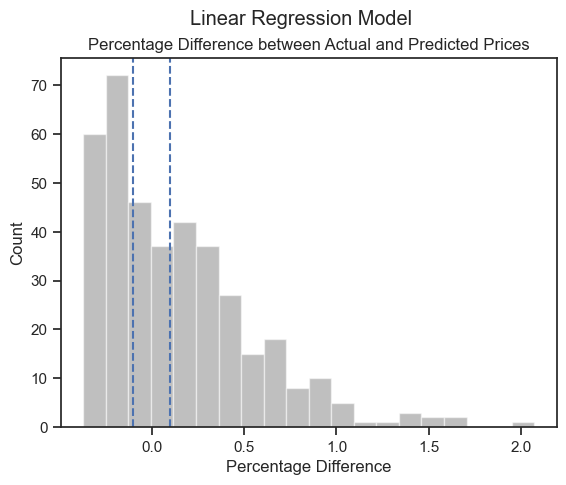

In [599]:
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
plt.hist(lr_e['Diff'], bins=20, color='gray',alpha=0.5)
plt.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
plt.axvline(x=-0.1, color='b', linestyle='--')
plt.title('Percentage Difference between Actual and Predicted Prices')
plt.suptitle('Linear Regression Model')
plt.xlabel('Percentage Difference')
plt.ylabel('Count');

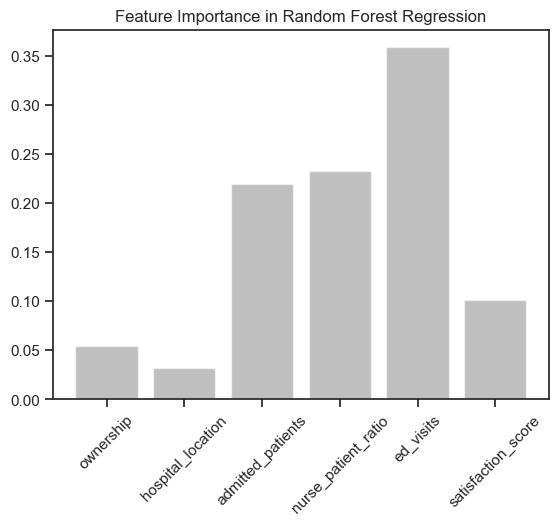

In [600]:
# Extracting important features from the trained Random Forest Regression model
importances = Rf_reg.feature_importances_
f_importance = {}
for i in range(len(feature_cols)):
     f_importance[feature_cols[i]] = importances[i]
        
plt.bar(f_importance.keys(),f_importance.values(),alpha=0.5,color='gray')
plt.xticks(rotation=45)
plt.title('Feature Importance in Random Forest Regression')
plt.show()

In [601]:
X_test['Predicted_price'] = np.round((rf_pred),0)
X_test['Price'] = np.round((y_test),0)
rf_e = X_test
rf_e['Diff'] = (rf_e['Predicted_price'] - rf_e['Price'])/rf_e['Price']

pct_e = []
for p in pct:
    within_pct = len([d for d in rf_e['Diff'] if abs(d) <= p])
    pct_e.append(within_pct/len(lr_e['Diff']) )      
    print(f' Margin of error in {int(p*100)}% range: {within_pct/len(lr_e["Diff"])}')

 Margin of error in 5% range: 0.09560723514211886
 Margin of error in 10% range: 0.1937984496124031
 Margin of error in 15% range: 0.28165374677002586
 Margin of error in 20% range: 0.39018087855297157


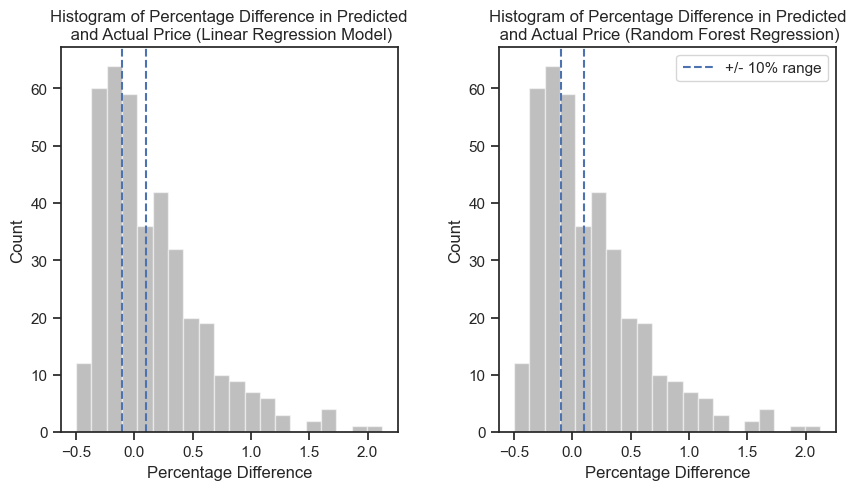

In [602]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Linear Regression Model
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
ax1.hist(lr_e['Diff'], bins=20, color='gray',alpha=0.5)
ax1.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
ax1.axvline(x=-0.1, color='b', linestyle='--')
ax1.set_title('Histogram of Percentage Difference in Predicted\n and Actual Price (Linear Regression Model)')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('Count')

# Random Forest Regression
rf_e['Diff'] = (rf_e['Predicted_price'] - rf_e['Price'])/rf_e['Price']
ax2.hist(rf_e['Diff'], bins=20, color='gray',alpha=0.5)
ax2.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
ax2.axvline(x=-0.1, color='b', linestyle='--')
ax2.set_title('Histogram of Percentage Difference in Predicted\n and Actual Price (Random Forest Regression)')
ax2.set_xlabel('Percentage Difference')
ax2.set_ylabel('Count')

plt.legend(loc='upper right')
plt.subplots_adjust(wspace=0.3)
plt.show()

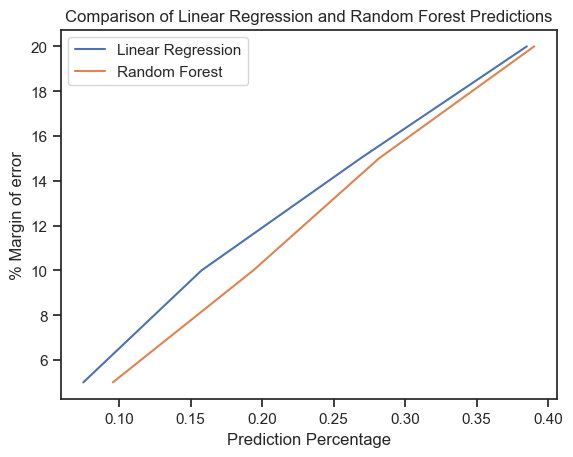

In [603]:
fig, ax = plt.subplots()
plt.title("Comparison of Linear Regression and Random Forest Predictions")
sns.lineplot(x=pct_lr, y=pct*100, label="Linear Regression", ax=ax)
sns.lineplot(x=pct_e, y=pct*100, label="Random Forest", ax=ax)
plt.xlabel("Prediction Percentage")
plt.ylabel("% Margin of error")
plt.show()

## Final Summary and Recommendations

we have analyzed healthcare revenue data using data science techniques and explored variables' relationships with revenue. Our findings indicate that hospital_location and ed_visits,satisfaction_score have a significant influence on revenue generation. However, models' performance on predicting revenue within 10% margin fell short, with both models yielding a low R-squared value. Consequently, we suggest further analysis and improvements to our models to meet the business objective.

Recommendations:

1. Nurse-Patient ratio has high feature importance indicating that maintaining a good nurse-patient ratio,availability during emergency will helps in bringing more revenue to the healthcare.
   
2. Explore additional features that may help improve the model's performance, such as patient demographics, specialty, and insurance.

3. Consider applying Advance regression models by hyper parameter tuning.

4. Focus on acquiring additional data to ensure data is more consistent across various clinics and hospitals.

5. Consider implementing strategies to improve patient satisfaction scores, as they play a vital role in clinic revenue.

